## Iris Plants Database

#### Relevant Information
- This is perhaps the best known database to be found in the pattern recognition literature.
- Fisher's paper is a classic in the field and is referenced frequently to this day.
- The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.
- One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.
- Predicted attribute: class of iris plant.
- This is an exceedingly simple domain.
- This data differs from the data presented in Fishers article.

#### Attribute Information:
- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm
- class: 
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica

Missing Attribute Values: None  
Number of Instances: 150 (50 in each of three classes)  
Number of Attributes: 4 numeric, predictive attributes and the class  

### Notebook Initialization
<b>NOTE</b>: This notebook contains a few advanced interactive plots using plotly library, so in order to have the best user experience, please run this notebook once.

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import scipy as scipy
import matplotlib as matplot
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import time
import plotly.express as px
import plotly.io as pio

import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.precision", 4)
np.random.seed(2021)

In [2]:
# features available in the given Iris dataset:
# sepal_length
# sepal_width
# petal_length
# petal_width
# class

feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [3]:
# lets create the dataframe for the iris dataset
iris_original_df = pd.read_csv('iris.data', names=feature_names)
df = iris_original_df.copy()
iris_dataset_csv = df.to_csv('iris-dataset.csv', index=False)

### Exploratory Data Analysis

In [4]:
# print the first 10 data-points (rows) of the given iris dataset
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Lets count the unique values for the target variable 'class' 
df['class'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: class, dtype: int64

#### OBSERVATIONS:
- There are no missing values for any feature present in the given dataset.
- There are 3 unique classes wrt the target variable.
- Each of the 3 unique classes has the equal frequency.

In [7]:
# Lets see the dataset summary
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.0000,150.0000,150.0000,150.0000
mean,5.8433,3.0540,3.7587,1.1987
std,0.8281,0.4336,1.7644,0.7632
min,4.3000,2.0000,1.0000,0.1000
25%,5.1000,2.8000,1.6000,0.3000
50%,5.8000,3.0000,4.3500,1.3000
75%,6.4000,3.3000,5.1000,1.8000
max,7.9000,4.4000,6.9000,2.5000


In [8]:
def showFeatureInfo(attr):
    print('Feature Info:')
    q1 = df[attr].quantile(0.25)
    q3 = df[attr].quantile(0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5*iqr
    upper_whisker = q3 + 1.5*iqr
    print('MIN :', df[attr].min())
    print('MAX :', df[attr].max())
    print('MEAN :', df[attr].mean())
    print('Std Deviation :', df[attr].std())
    print('Q1 :', q1)
    print('Q3 :', q3)
    print('IQR :', iqr)
    print('LowerWhisker :', lower_whisker)
    print('UpperWhisker :', upper_whisker)

In [9]:
def analyzeTheFeature(attr):
    _ = showFeatureInfo(attr)
    ndf = df[attr]
    fig, ax = plt.subplots(1, 3, figsize=(12,4))
    _ = sns.distplot(ndf, bins=50, kde=True, ax=ax[0])
    _ = sns.boxplot(ndf, ax=ax[1])
    _ = ndf.hist(ax=ax[2])
    fig.show()

Feature Info:
MIN : 4.3
MAX : 7.9
MEAN : 5.843333333333334
Std Deviation : 0.828066127977863
Q1 : 5.1
Q3 : 6.4
IQR : 1.3000000000000007
LowerWhisker : 3.1499999999999986
UpperWhisker : 8.350000000000001


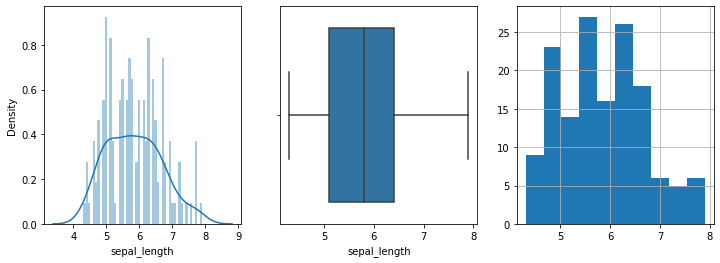

In [10]:
_ = analyzeTheFeature('sepal_length')

Feature Info:
MIN : 2.0
MAX : 4.4
MEAN : 3.0540000000000003
Std Deviation : 0.4335943113621737
Q1 : 2.8
Q3 : 3.3
IQR : 0.5
LowerWhisker : 2.05
UpperWhisker : 4.05


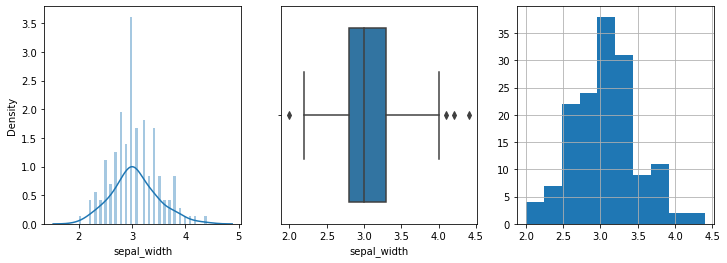

In [11]:
_ = analyzeTheFeature('sepal_width')

Feature Info:
MIN : 1.0
MAX : 6.9
MEAN : 3.758666666666666
Std Deviation : 1.7644204199522626
Q1 : 1.6
Q3 : 5.1
IQR : 3.4999999999999996
LowerWhisker : -3.649999999999999
UpperWhisker : 10.349999999999998


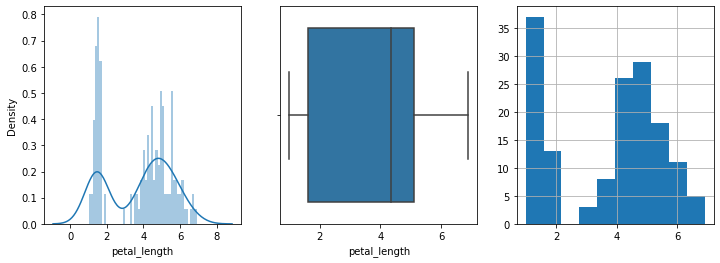

In [12]:
_ = analyzeTheFeature('petal_length')

Feature Info:
MIN : 0.1
MAX : 2.5
MEAN : 1.1986666666666668
Std Deviation : 0.7631607417008411
Q1 : 0.3
Q3 : 1.8
IQR : 1.5
LowerWhisker : -1.95
UpperWhisker : 4.05


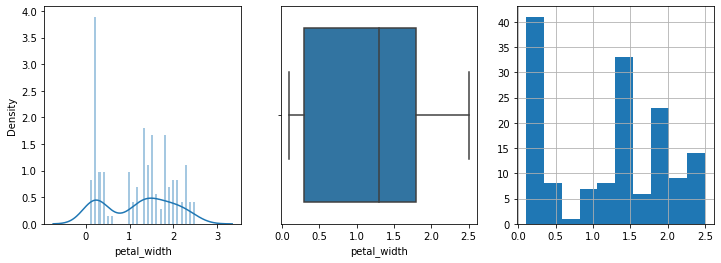

In [13]:
_ = analyzeTheFeature('petal_width')

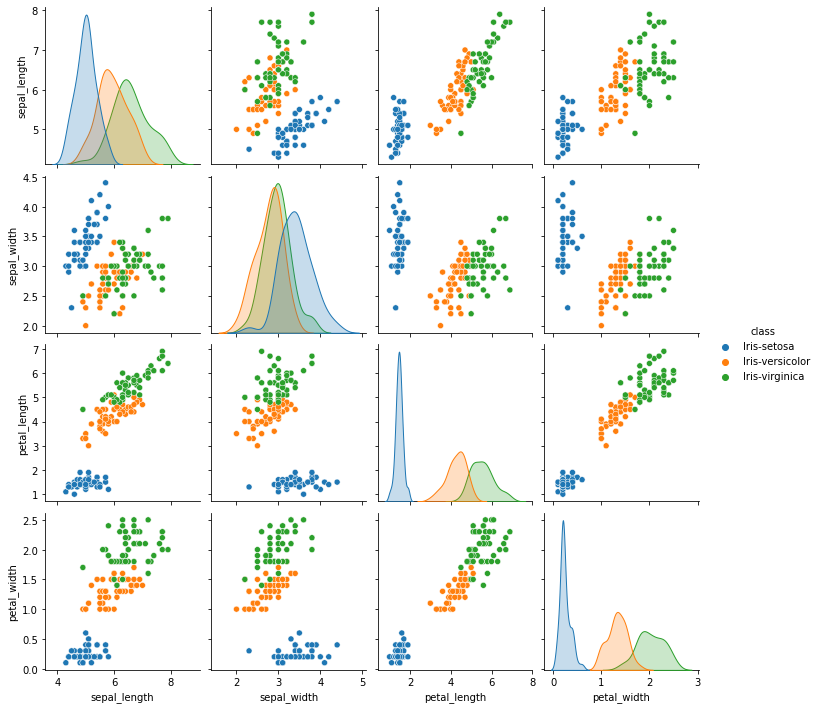

In [14]:
# Check for the outliers
_ = sns.pairplot(df, hue = "class", height = 2.5)

In [15]:
# Correlate the different columns of the dataset
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.0000,-0.1094,0.8718,0.8180
sepal_width,-0.1094,1.0000,-0.4205,-0.3565
petal_length,0.8718,-0.4205,1.0000,0.9628
petal_width,0.8180,-0.3565,0.9628,1.0000


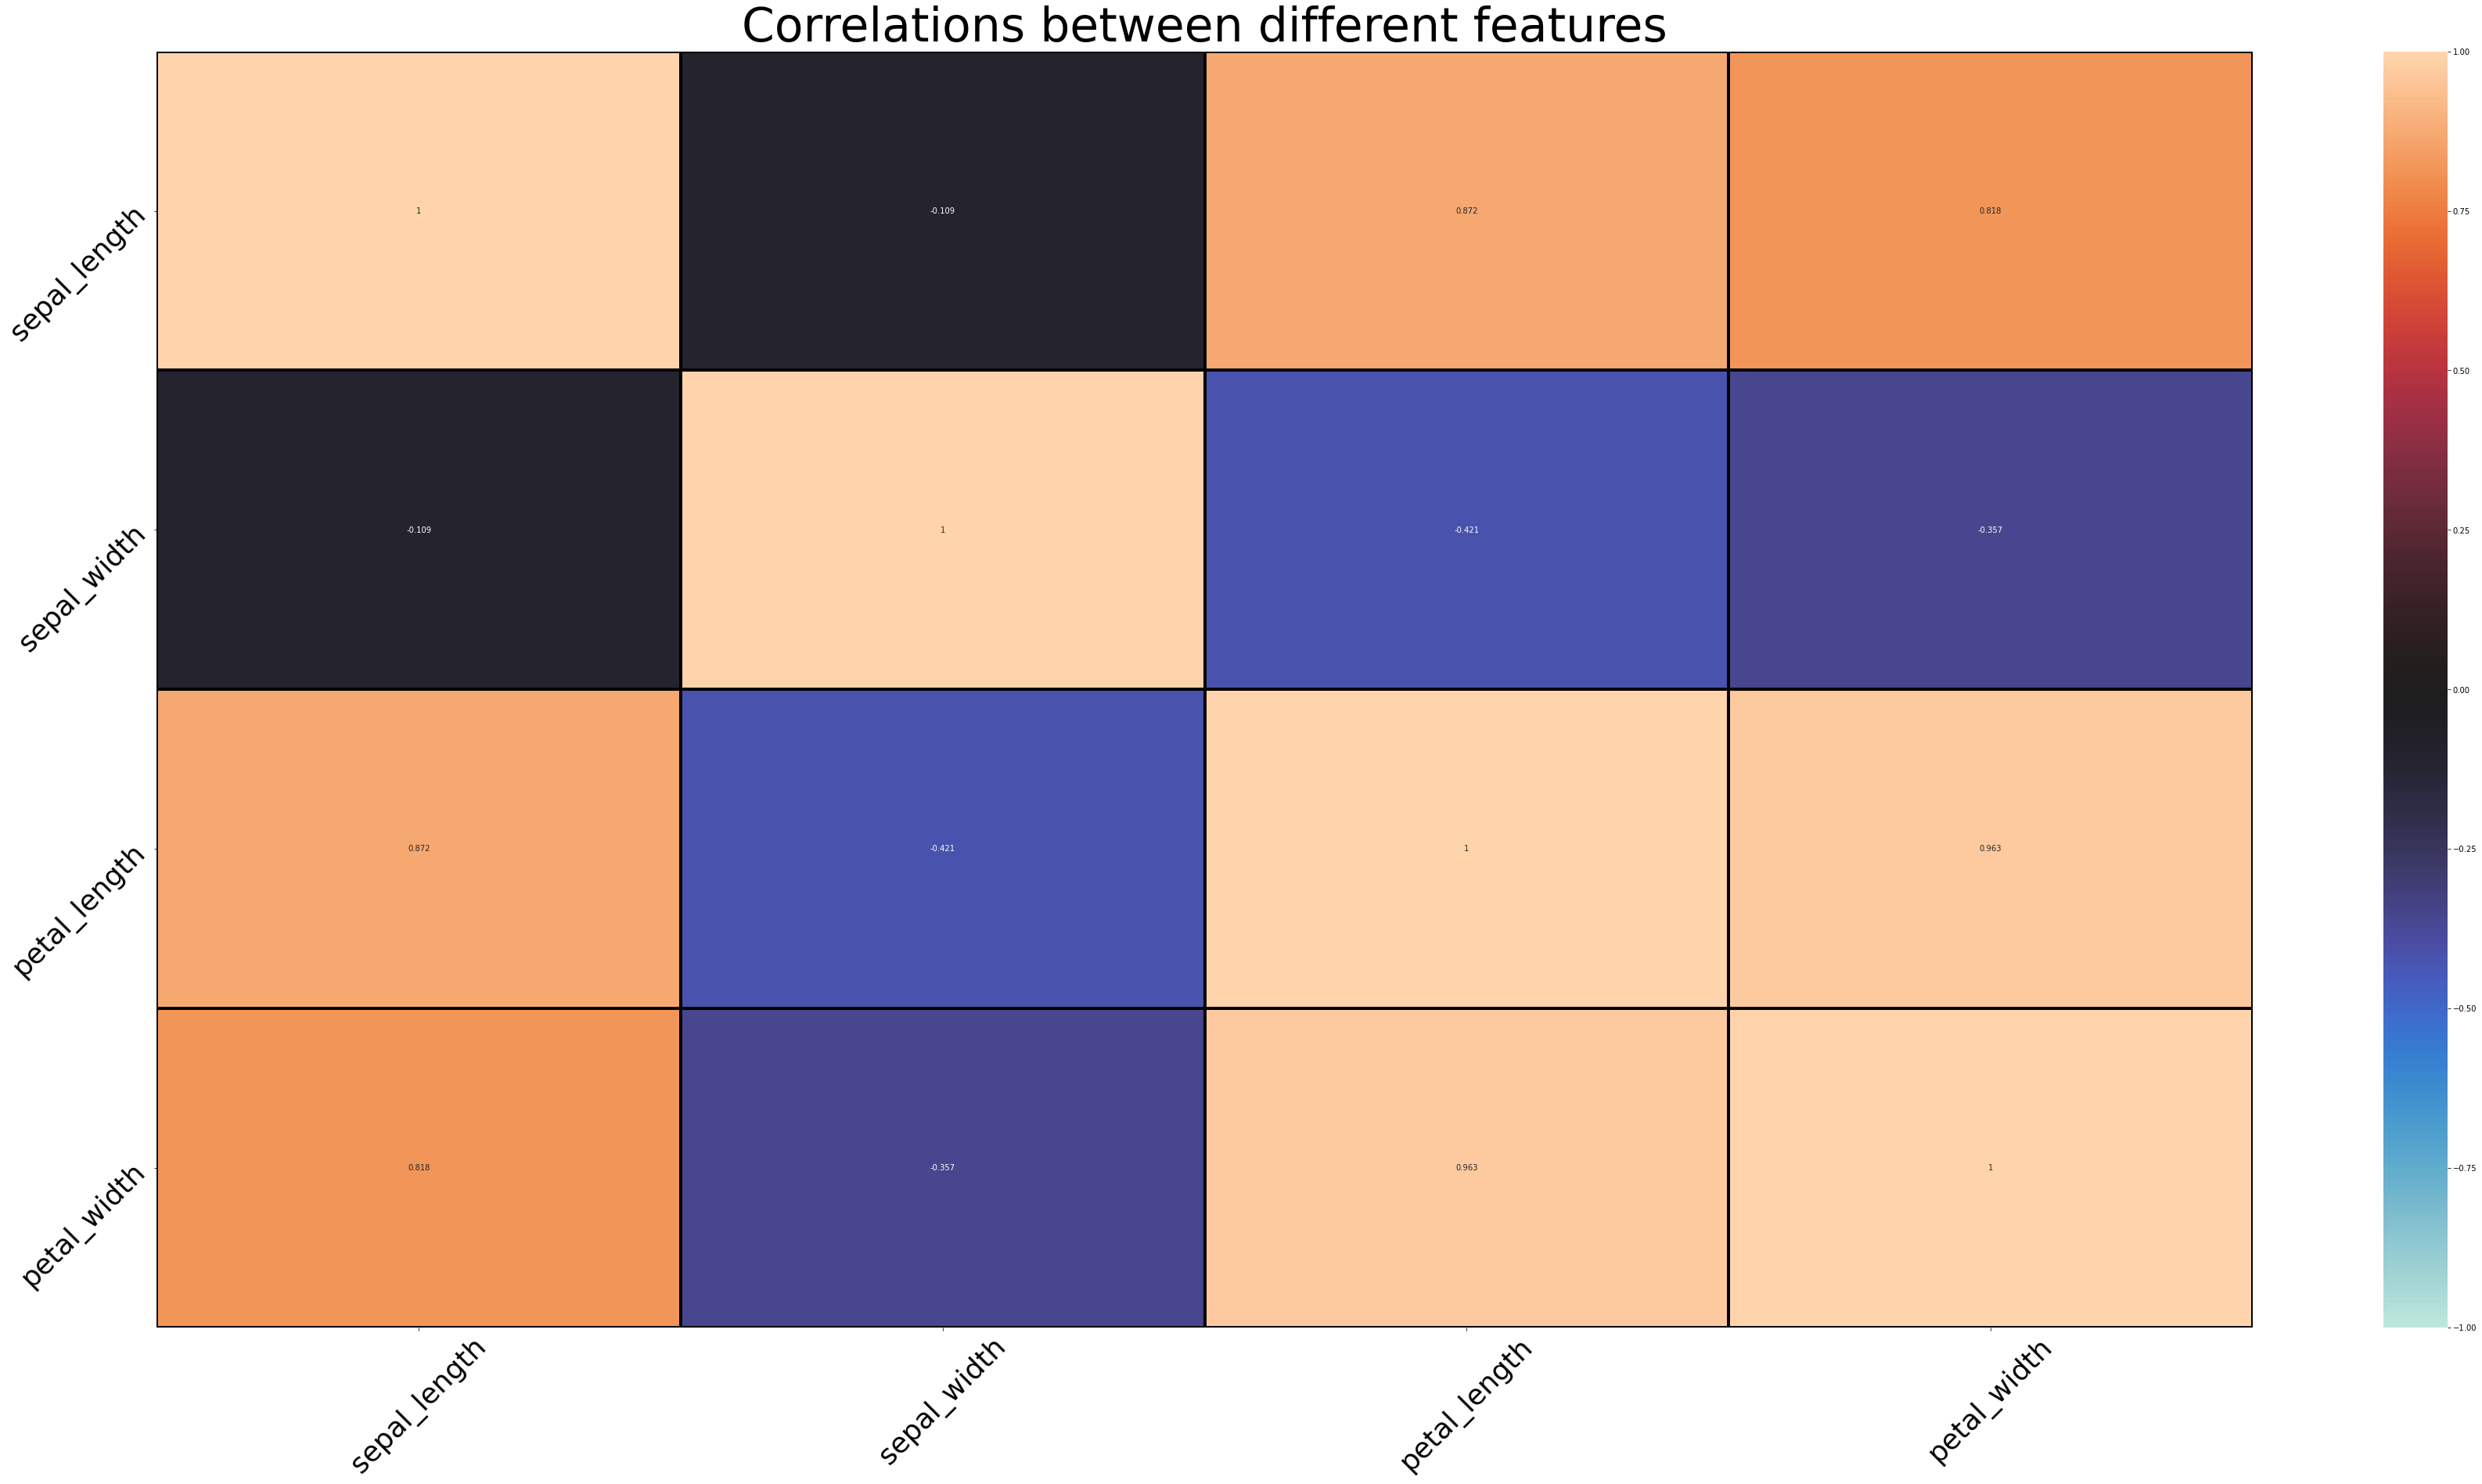

In [16]:
dataframe = df.iloc[:,:-1]
fig, ax = plt.subplots(figsize=(60, 30))
heatmap = sns.heatmap(dataframe.corr(), annot=True, fmt='.3g', ax=ax, vmin=-1, vmax=1, center=0, linewidths=3, linecolor='black')

plt.xticks(rotation=45)
plt.yticks(rotation=45)

heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize=36)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize=36)

plt.title('Correlations between different features', fontsize=60)
plt.show()

#### OBSERVATIONS:
- petal_length and petal_width have maximum value for correlation coefficient (0.9628)
- sepal_length and sepal_width have minimum value for correlation coefficient (0.1094)

### Interactive Plots

In [17]:
# 3D Scatter Plots
# x-axis: sepal_length
# y-axis: sepal_width
# z-axis: petal_width
    
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width', color='class')
fig.show()

In [18]:
# 3D Scatter Plots
# x-axis: sepal_length
# y-axis: sepal_width
# z-axis: petal_length
    
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_length', color='class')
fig.show()

In [19]:
# 3D Scatter Plots
# x-axis: petal_length
# y-axis: petal_width
# z-axis: sepal_length
    
fig = px.scatter_3d(df, x='petal_length', y='petal_width', z='sepal_length', color='class')
fig.show()

In [20]:
# 3D Scatter Plots
# x-axis: petal_length
# y-axis: petal_width
# z-axis: sepal_width
    
fig = px.scatter_3d(df, x='petal_length', y='petal_width', z='sepal_width', color='class')
fig.show()

In [21]:
# box plot for the features present in the given iris dataset
_ = df.iplot(kind='box')

In [22]:
# _ = df.iplot(kind='scatter', x='sepal_length', y='sepal_width', mode='markers')

In [23]:
# _ = df.iplot(kind='scatter', x='petal_length', y='petal_width', mode='markers')

In [24]:
# spread plot for the features present in the given iris dataset
# The spread plot shows the spread between two or more than numerical columns at any particular point.
_ = df.iplot(kind='spread')

### ML Model Development and Evaluation
We will first split the dependent(X) and independent(Y) features.

In [25]:
# dependent_variables = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# independent_variables = ['class']

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
Y = df[['class']]

# Lets encode the target variable
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
# 0 for Iris-setosa
# 1 for Iris-versicolour
# 2 for Iris-virginica

Lets split the dataset across training and testing datasets in the ratio of 7:3


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2021)

#### Create the output files for the different models

In [27]:
def createOutputFile(Y_test, Y_pred, algo):
    """
        algo can take one of the three values only: 
        LR --> Logistic Regression 
        RF --> Random Forest
        GNB --> Gaussian Naive Bayes
    """
    decoded_Y_test = encoder.inverse_transform(Y_test)
    decoded_Y_pred = encoder.inverse_transform(Y_pred)
    output = pd.DataFrame({'Actual':decoded_Y_test,'Predicted':decoded_Y_pred})
    
    if (algo is 'LR'):
        output.to_csv('logistic_regression_output.csv', index=False)
    elif (algo is 'RF'):
        output.to_csv('random_forest_output.csv', index=False)
    elif (algo is 'GNB'):
        output.to_csv('gaussian_naive_bayes_output.csv', index=False)
    else:
        pass

#### Lets build the model using Logistic Regression

In [28]:
lr_classifier = LogisticRegression(random_state=2021)
_ = lr_classifier.fit(X_train, Y_train)
Y_pred = lr_classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

total_denominator = (cm[0][0] + cm[0][1] + cm[0][2] + cm[1][0] + cm[1][1] + cm[1][2] + cm[2][0] + cm[2][1] + cm[2][2])
lr_model_accuracy = (100 * (cm[0][0] + cm[1][1] + cm[2][2])/(total_denominator))
print("Logistic Regression Model Accuracy: {:.2f}".format(lr_model_accuracy))
lr_misclassification = (100 - lr_model_accuracy)
print("Logistic Regression Model Misclassification: {:.2f}".format(lr_misclassification))

logistic_regression_cv_accuracies = cross_val_score(estimator = lr_classifier, 
                                                    X = X_train, 
                                                    y = Y_train, 
                                                    cv = 10, 
                                                    scoring = 'accuracy')

logistic_regression_cv_accuracies_mean = (logistic_regression_cv_accuracies.mean() * 100)
logistic_regression_cv_accuracies_std = (logistic_regression_cv_accuracies.std() * 100)

print()
print("Inferences made wrt Logistic Regression Classifier:")
print("Logistic Regression Cross Validation Mean Accuracy: {:.2f} %".format(logistic_regression_cv_accuracies_mean))
print("Logistic Regression Cross Validation Standard-Deviation: {:.2f} %".format(logistic_regression_cv_accuracies_std))
print("Logistic Regression Accuracy Score:", accuracy_score(Y_test, Y_pred))

# uncomment the following line to create the output file wrt the logistic-regression classifier
# _ = createOutputFile(Y_test, Y_pred, 'LR')

# preserve the tests and predictions data
lr_Y_test = Y_test
lr_Y_pred = Y_pred
lr_X_test = X_test

Logistic Regression Model Accuracy: 100.00
Logistic Regression Model Misclassification: 0.00

Inferences made wrt Logistic Regression Classifier:
Logistic Regression Cross Validation Mean Accuracy: 95.27 %
Logistic Regression Cross Validation Standard-Deviation: 4.74 %
Logistic Regression Accuracy Score: 1.0


#### Confusion Matrix for the model based on Logistic Regression 

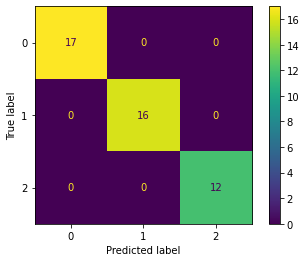

In [29]:
_ = plot_confusion_matrix(lr_classifier, lr_X_test, lr_Y_test)  

#### Lets build the model using Random Forest

In [30]:
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
_ = rf_classifier.fit(X_train, Y_train)
Y_pred = rf_classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

total_denominator = (cm[0][0] + cm[0][1] + cm[0][2] + cm[1][0] + cm[1][1] + cm[1][2] + cm[2][0] + cm[2][1] + cm[2][2])
rf_model_accuracy = (100 * (cm[0][0] + cm[1][1] + cm[2][2])/(total_denominator))
print("Random Forest Model Accuracy: {:.2f}".format(rf_model_accuracy))
rf_misclassification = (100 - rf_model_accuracy)
print("Random Forest Model Misclassification: {:.2f}".format(rf_misclassification))

rf_cv_accuracies = cross_val_score(estimator = rf_classifier, 
                                    X = X_train, 
                                    y = Y_train, 
                                    cv = 10, 
                                    scoring = 'accuracy')

rf_cv_accuracies_mean = (rf_cv_accuracies.mean() * 100)
rf_cv_accuracies_std = (rf_cv_accuracies.std() * 100)

print()
print("Inferences made wrt Random Forest Classifier:")
print("Random Forest Cross Validation Mean Accuracy: {:.2f} %".format(rf_cv_accuracies_mean))
print("Random Forest Cross Validation Standard-Deviation: {:.2f} %".format(rf_cv_accuracies_std))
print("Random Forest Accuracy Score:", accuracy_score(Y_test, Y_pred))

# uncomment the following line to create the output file wrt the random-forest classifier
# _ = createOutputFile(Y_test, Y_pred, 'RF')

# preserve the tests and predictions data
rf_Y_test = Y_test
rf_Y_pred = Y_pred
rf_X_test = X_test

Random Forest Model Accuracy: 95.56
Random Forest Model Misclassification: 4.44

Inferences made wrt Random Forest Classifier:
Random Forest Cross Validation Mean Accuracy: 96.18 %
Random Forest Cross Validation Standard-Deviation: 4.69 %
Random Forest Accuracy Score: 0.9555555555555556


#### Confusion Matrix for the model based on Random Forest

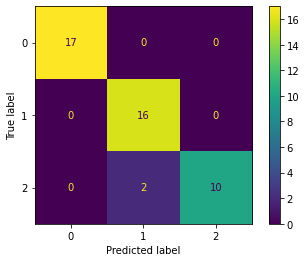

In [31]:
_ = plot_confusion_matrix(rf_classifier, rf_X_test, rf_Y_test) 

#### Lets build the model using Naive Bayes

In [32]:
gnb_classifier = GaussianNB()
_ = gnb_classifier.fit(X_train, Y_train)
Y_pred = gnb_classifier.predict(X_test)

confusion_matrix(Y_test, Y_pred)
total_denominator = (cm[0][0] + cm[0][1] + cm[0][2] + cm[1][0] + cm[1][1] + cm[1][2] + cm[2][0] + cm[2][1] + cm[2][2])
gnb_model_accuracy = (100 * (cm[0][0] + cm[1][1] + cm[2][2])/(total_denominator))
print("Gaussian Naive Bayes Model Accuracy: {:.2f}".format(gnb_model_accuracy))
gnb_misclassification = (100 - gnb_model_accuracy)
print("Gaussian Naive Bayes Model Misclassification: {:.2f}".format(gnb_misclassification))

gnb_cv_accuracies = cross_val_score(estimator = gnb_classifier, 
                                    X = X_train, 
                                    y = Y_train, 
                                    cv = 10, 
                                    scoring = 'accuracy')

gnb_cv_accuracies_mean = (gnb_cv_accuracies.mean() * 100)
gnb_cv_accuracies_std = (gnb_cv_accuracies.std() * 100)

print()
print("Inferences made wrt Gaussian Naive Bayes Classifier:")
print("Gaussian Naive Bayes Cross Validation Mean Accuracy: {:.2f} %".format(gnb_cv_accuracies_mean))
print("Gaussian Naive Bayes Cross Validation Standard-Deviation: {:.2f} %".format(gnb_cv_accuracies_std))
print("Gaussian Naive Bayes Accuracy Score:", accuracy_score(Y_test, Y_pred))

# uncomment the following line to create the output file wrt the gaussian-naive-bayes classifier
# _ = createOutputFile(Y_test, Y_pred, 'GNB')

# preserve the tests and predictions data
gnb_Y_test = Y_test
gnb_Y_pred = Y_pred
gnb_X_test = X_test

Gaussian Naive Bayes Model Accuracy: 95.56
Gaussian Naive Bayes Model Misclassification: 4.44

Inferences made wrt Gaussian Naive Bayes Classifier:
Gaussian Naive Bayes Cross Validation Mean Accuracy: 95.18 %
Gaussian Naive Bayes Cross Validation Standard-Deviation: 6.58 %
Gaussian Naive Bayes Accuracy Score: 0.9555555555555556


#### Confusion Matrix for the model based on Gaussian Naive Bayes

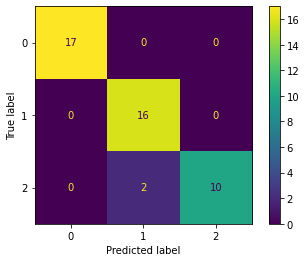

In [33]:
_ = plot_confusion_matrix(gnb_classifier, gnb_X_test, gnb_Y_test) 

### CONCLUSION:
-  Random Forest based ML model has the maximum accuracy of 96.18% and minimum Standard-Deviation of 4.69% for cross-validation dataset.
- Whereas, Logistic Regression performs best with the test-dataset without cross-validation.

<b>NOTE</b>: Upon executing this notebook, three csv files would get created in the current directory containing the output wrt each model that has been discussed.  
<b>NOTE</b>: A default csv file would get created containing the output wrt the Random Forest model.

#### Creating the output file for the random-forest classifier, since it has the best cross-validation accuracy

In [34]:
decoded_Y_test = encoder.inverse_transform(rf_Y_test)
decoded_Y_pred = encoder.inverse_transform(rf_Y_pred)
output = pd.DataFrame({'Actual':decoded_Y_test,'Predicted':decoded_Y_pred})
output.to_csv('output.csv', index=False)

## THE END